In [43]:
import numpy  as np
import pandas as pd

from matplotlib           import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('bmh')

from sklearn.svm     import SVC              as svm
from sklearn.metrics import confusion_matrix as CM

In [7]:
def gen_index(N=300, P=.7):
    indx  = np.arange(N)
    np.random.shuffle(indx)
    itrain, itest = indx[ :int(N*P) ], indx[ int(N*P): ]
    return itrain.copy(), itest.copy()

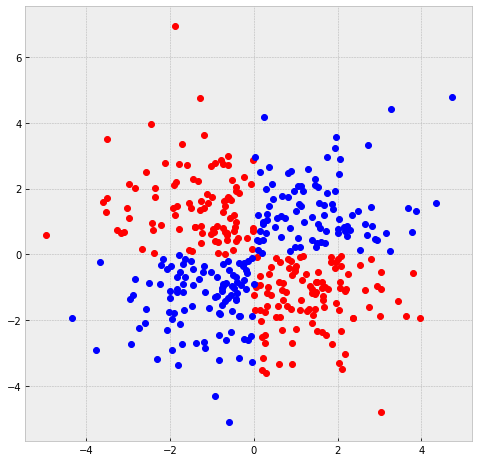

In [2]:
M = np.array( [0,0] )
S = np.array([[3,0],
              [0,3] ] )
N = 400
X = np.random.multivariate_normal(M,S,N)
Y = -2*( X.prod(axis=1) < 0 ) + 1

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1],'ro' )
plt.plot( X[Y== 1,0],X[Y== 1,1],'bo' )

In [15]:
idxtrain, idxtest = gen_index( X.shape[0],.8 )

X_Train = X[idxtrain]
Y_Train = Y[idxtrain]

X_Test  = X[idxtest]
Y_Test  = Y[idxtest]

In [49]:
model_svm = svm(kernel='linear')

model_svm.fit(X_Train,Y_Train)

L = model_svm.predict(X_Test)
CM(Y_Test,L)

#for i,j in zip(Y_Test,L):
#    print( '{:2d}, {:2d}'.format(i,j) )

array([[41,  0],
       [39,  0]])

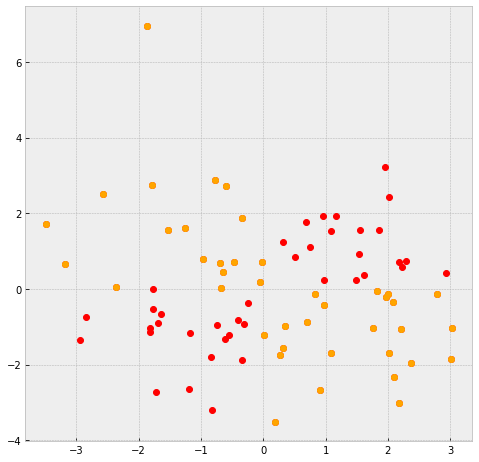

In [27]:
plt.figure(figsize=(8,8))
plt.plot( X_Test[L     ==-1,0],X_Test[L     ==-1,1],'ro' )
plt.plot( X_Test[Y_Test==-1,0],X_Test[Y_Test==-1,1], 'o',color='orange' )

In [35]:
X_New = np.concatenate( (X, X.prod(axis=1)[:,np.newaxis]),axis=1 )
X_New

array([[ 1.14363540e+00, -7.92977750e-01, -9.06877426e-01],
       [ 3.63256477e+00, -1.86766672e+00, -6.78442034e+00],
       [-1.48602904e+00, -1.97977150e-01,  2.94199794e-01],
       ...,
       [ 8.32152903e-02, -7.43065521e-02, -6.18344131e-03],
       [-5.66875845e-02, -2.49465177e+00,  1.41415783e-01],
       [-1.02313341e+00, -5.37091112e-01,  5.49515862e-01]])

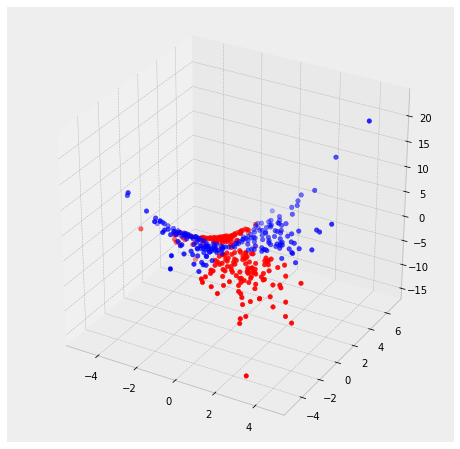

In [42]:
fig = plt.figure( figsize=(8,8) )
ax  = fig.add_subplot(111, projection='3d')

ax.scatter( X_New[Y==-1,0], X_New[Y==-1,1], X_New[Y==-1,2], c='r', marker='o')
ax.scatter( X_New[Y== 1,0], X_New[Y== 1,1], X_New[Y== 1,2], c='b', marker='o')

In [71]:
X_Train = X_New[idxtrain]
X_Test  = X_New[idxtest]

model_svm = svm(kernel='linear',probability=True)
model_svm.fit(X_Train,Y_Train)

L = model_svm.predict(X_Test)

CM(Y_Test,L)

array([[39,  2],
       [ 0, 39]])

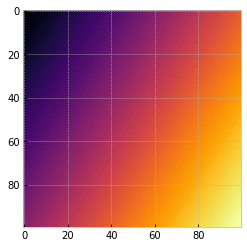

In [100]:
linspace = np.linspace( -5,5,100 )
grid     = np.meshgrid( linspace,linspace )
grid     = np.array(grid)
s        = grid.shape
grid     = grid.reshape(s[0],s[1]*s[2])
grid     = np.concatenate( (grid,np.zeros(s[1]*s[2])[np.newaxis] )    )

LP = model_svm.predict_proba(grid.T)
plt.imshow( LP[:,0].reshape(s[1],s[2]),cmap='inferno' )

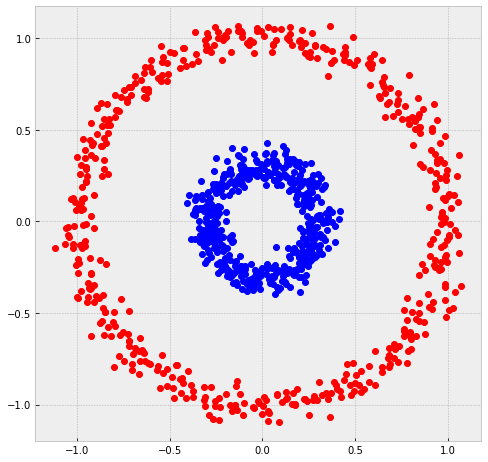

In [101]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=1000, factor=.3, noise=.05)

plt.figure(figsize=(8,8))
plt.plot( X[Y==0,0],X[Y==0,1],'ro' )
plt.plot( X[Y==1,0],X[Y==1,1],'bo' )

In [102]:
idxtrain, idxtest = gen_index( X.shape[0],.8 )

X_Train = X[idxtrain]
Y_Train = Y[idxtrain]

X_Test  = X[idxtest]
Y_Test  = Y[idxtest]

In [104]:
#model_svm = svm(kernel='linear',probability=True)
model_svm = svm(kernel='rbf',probability=True)
model_svm.fit(X_Train,Y_Train)

L = model_svm.predict(X_Test)

CM(Y_Test,L)

array([[ 99,   0],
       [  0, 101]])

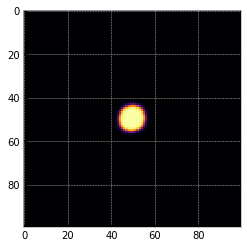

In [109]:
linspace = np.linspace( -5,5,100 )
grid     = np.meshgrid( linspace,linspace )
grid     = np.array(grid)
grid     = grid.reshape(s[0],s[1]*s[2])

LP = model_svm.predict_proba(grid.T)
plt.imshow( LP[:,1].reshape(s[1],s[2]),cmap='inferno' )

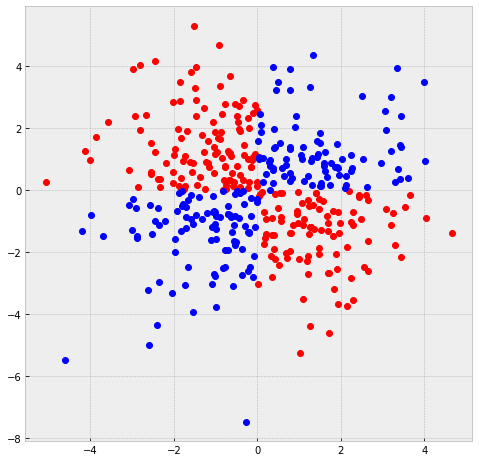

In [110]:
M = np.array( [0,0] )
S = np.array([[3,0],
              [0,3] ] )
N = 400
X = np.random.multivariate_normal(M,S,N)
Y = -2*( X.prod(axis=1) < 0 ) + 1

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1],'ro' )
plt.plot( X[Y== 1,0],X[Y== 1,1],'bo' )

In [126]:
idxtrain, idxtest = gen_index( X.shape[0],.8 )

X_Train = X[idxtrain]
Y_Train = Y[idxtrain]

X_Test  = X[idxtest]
Y_Test  = Y[idxtest]

model_svm = svm(kernel='rbf',C=5000, degree=4,probability=True)
model_svm.fit(X_Train,Y_Train)

L = model_svm.predict(X_Test)

CM(Y_Test,L)

array([[42,  0],
       [ 0, 38]])

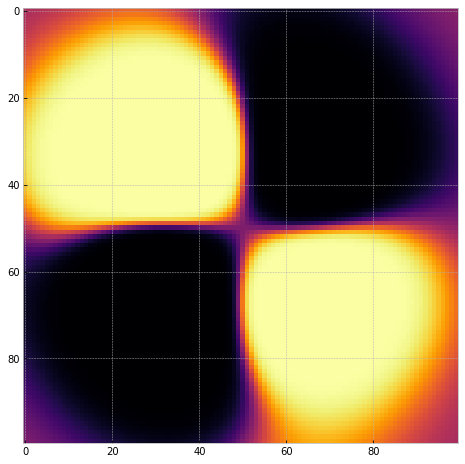

In [127]:
linspace = np.linspace( -5,5,100 )
grid     = np.meshgrid( linspace,linspace )
grid     = np.array(grid)
grid     = grid.reshape(s[0],s[1]*s[2])

LP = model_svm.predict_proba(grid.T)
plt.figure(figsize=(8,8))
plt.imshow( LP[:,1].reshape(s[1],s[2]),cmap='inferno' )